# Data Import

In [16]:
import pandas as pd

df = pd.read_csv("ARIMA.csv")

df = df[['year' , 'week_no' , 'weekend' , 'top10_gross']]

df.head()

,year,week_no,weekend,top10_gross
0,1977,21,1977_May_w4,1554475.0
1,1977,24,1977_Jun_w3,16358821.0
2,1977,25,1977_Jun_w4,4885463.0
3,1977,26,1977_Jun_w5,7452980.0
4,1977,27,1977_Jul_w1,6197462.0


In [43]:
import pandas as pd
import yfinance as yf

# Corrected function
def get_friday_from_weekend(weekend_str):
    # Split the string
    year, month, week = weekend_str.split('_')
    # Create a datetime object for the first day of the given month and year
    dt = pd.to_datetime(f'{year} {month} 1')
    # Calculate the first Friday of the month
    first_friday = dt + pd.offsets.Week(weekday=4)  # Weekday=4 denotes Friday
    if dt.dayofweek > 4:  # If the first day of the month is after Friday, adjust
        first_friday += pd.offsets.Week()
    # Calculate the Friday of the given week
    friday_of_week = first_friday + pd.DateOffset(weeks=int(week[-1])-1)
    return friday_of_week

# Assume df is your dataframe with the 'weekend' column
# df['weekend'] = ...

# Apply the function to create a 'friday' column
df['friday'] = df['weekend'].apply(get_friday_from_weekend)

# Function to get the closing price for a given Friday
def get_closing_price(date):
    # Fetch data for the Dow Jones on the given date
    stock_data = yf.download('^DJI', start=date, end=date + pd.DateOffset(days=1))
    # Get the closing price
    close_price = stock_data['Close'].iloc[0] if not stock_data.empty else None
    return close_price

# Get the closing price for each Friday
df['closing_price'] = df['friday'].apply(get_closing_price)

# print(df[['weekend', 'friday', 'closing_price']])


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^DJI: Data doesn't exist for startDate = 234158400, endDate = 234244800
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^DJI: Data doesn't exist for startDate = 235368000, endDate = 235454400
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^DJI: Data doesn't exist for startDate = 235972800, endDate = 236059200
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^DJI: Data doesn't exist for startDate = 236577600, endDate = 236664000
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^DJI: Data doesn't exist for startDate = 237182400, endDate = 237268800
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^DJI: Data doesn't exist for startDate = 237787200, endDate = 237873600
[*********************

In [47]:
df_bo_dj =  df.copy()

df_bo_dj = df_bo_dj.dropna(subset=['closing_price'])

df_bo_dj.head()

,year,week_no,weekend,top10_gross,friday,closing_price
732,1991,52,1991_Dec_w4,85312546.0,1992-01-03,3201.5
733,1992,1,1992_Jan_w1,70142590.0,1992-01-03,3201.5
734,1992,2,1992_Jan_w2,51597872.0,1992-01-10,3199.5
735,1992,3,1992_Jan_w3,5722135.0,1992-01-17,3265.0
736,1992,3,1992_Jan_w3,67367862.0,1992-01-17,3265.0


In [49]:
df_bo_dj.to_csv('Data/BoxOffice_DJ.csv')

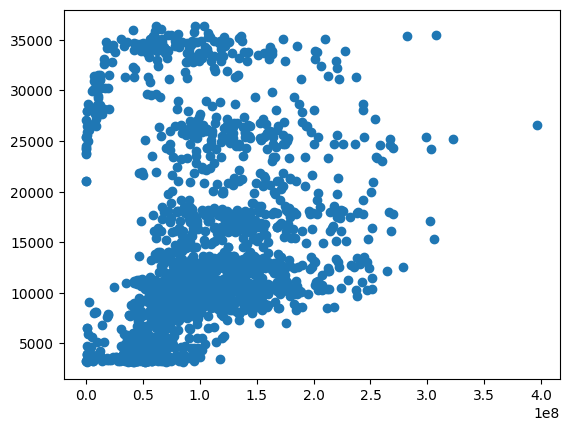

In [46]:
import matplotlib.pyplot as plt

plt.scatter(df_bo_dj['top10_gross'] , df_bo_dj['closing_price'])